Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## Análise de dados exploratória (EDA)

### Carregando o dataset

In [2]:
df = pd.read_csv('../files/dataset.csv')

### Verificar linhas duplicadas

In [3]:
df[df.duplicated()]

,title,text,date,category,subcategory
7268,São as águas de Marte fechando o verão. É prom...,Dados colhidos por uma espaçonave da Nasa conf...,2015-09-28,ciencia,NaN
11042,Ex-militante pela queda de Dilma se foca em co...,RESUMO - Ex-militante entusiasmada de grupos q...,2015-12-27,poder,NaN
14357,São as águas de Marte fechando o verão. É prom...,Dados colhidos por uma espaçonave da Nasa conf...,2015-09-28,ciencia,NaN
37070,São as águas de Marte fechando o verão. É prom...,Dados colhidos por uma espaçonave da Nasa conf...,2015-09-28,ciencia,NaN
45187,Nota de dólar terá mulher pela primeira vez,O Departamento do Tesouro dos EUA anunciou que...,2015-06-18,mercado,NaN
45306,Faltava vontade política para implantar ciclov...,Ex-coordenadora do Departamento de Planejament...,2015-06-28,cotidiano,NaN


Removendo linhas duplicadas

In [4]:

df.drop_duplicates(inplace=True)

Conferindo se possui linhas duplicadas

In [5]:
df[df.duplicated()]

,title,text,date,category,subcategory


### Análise inicial

Exibindo as 5 primeiras linhas do df

In [6]:
df.head()

,title,text,date,category,subcategory
0,"Haverá pressão por transparência no 'brexit', ...","As negociações do ""brexit"" devem ocorrer a por...",2017-03-31,mundo,NaN
1,Empresário confirma ter pago propina para obte...,"O empresário Augusto Ribeiro de Mendonça Neto,...",2015-03-02,poder,NaN
2,Falta de ataques do São Paulo surpreende corin...,Cássio sorriu e pareceu sem jeito com a pergun...,2015-02-19,esporte,NaN
3,Líderes de comissão do Senado não veem sinais ...,Os líderes dos partidos Republicano e Democrat...,2017-03-16,mundo,NaN
4,Renan opera contra governo e reforma trabalhis...,Um acordo que contou com a articulação de Rena...,2017-03-05,mercado,NaN


Exibindo as 5 ultimas linhas do df

In [7]:
df.tail()

,title,text,date,category,subcategory
51497,"Potencial da saúde ainda é pouco aproveitado, ...",Start-ups da área de saúde nos EUA levantaram ...,2015-07-13,mercado,NaN
51498,Vítima de racismo nega convite do Chelsea para...,Após ser vítima de atos racistas de torcedores...,2015-02-21,esporte,NaN
51499,Coreia do Sul promete resgatar balsa um ano ap...,"Um ano após o naufrágio da balsa Sewol, no qua...",2015-04-16,mundo,NaN
51500,Temer convoca PMDB para evento que debaterá te...,O vice-presidente Michel Temer (PMDB) aparece ...,2015-11-11,poder,NaN
51501,"Por 1 kg, Brasil perde prata no levantamento e...","A paulista Bruna Piloto, 24, garantiu a oitava...",2015-07-13,esporte,NaN


Verificando a quantidade de linhas e colunas

In [8]:
df.shape

(51496, 5)

### Informações Gerais

Dados sobre o formato das colunas e a contagem de não nulos

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51496 entries, 0 to 51501
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        51496 non-null  object
 1   text         51496 non-null  object
 2   date         51496 non-null  object
 3   category     51496 non-null  object
 4   subcategory  1907 non-null   object
dtypes: object(5)
memory usage: 2.4+ MB


Verificando algumas metricas do df

In [10]:
df.describe()

,title,text,date,category,subcategory
count,51496,51496,51496,51496,1907
unique,51328,51481,987,9,3
top,Veja os lançamentos da área jurídica em destaq...,O Cifras & Letras seleciona semanalmente lança...,2015-09-03,poder,olimpiada-no-rio
freq,37,3,102,11010,1418


Verificando se possui valores nulos

In [11]:
df.isnull().sum()

title              0
text               0
date               0
category           0
subcategory    49589
dtype: int64

### Distribuição das categorias

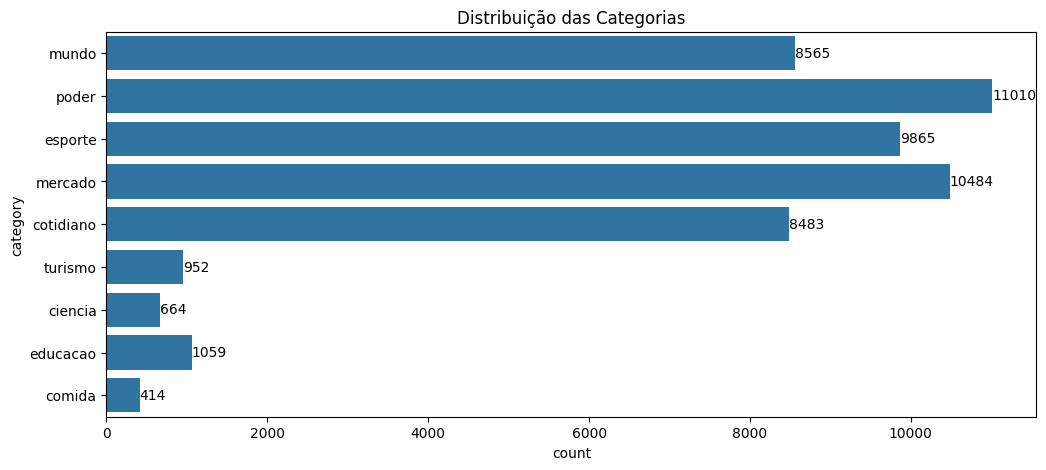

In [12]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(y='category', data=df)
plt.title('Distribuição das Categorias')

# valores no final das barras
for p in ax.patches:
    width = p.get_width()  #valor da largura da barra
    plt.text(width + 0.3,  # Posição x da anotação
             p.get_y() + p.get_height() / 2,  # Posição y da anotação
             int(width),  # Valor a ser anotado
             ha='left', va='center')  # Alinhamento da anotação

plt.show()

### Distribuição das subcategorias

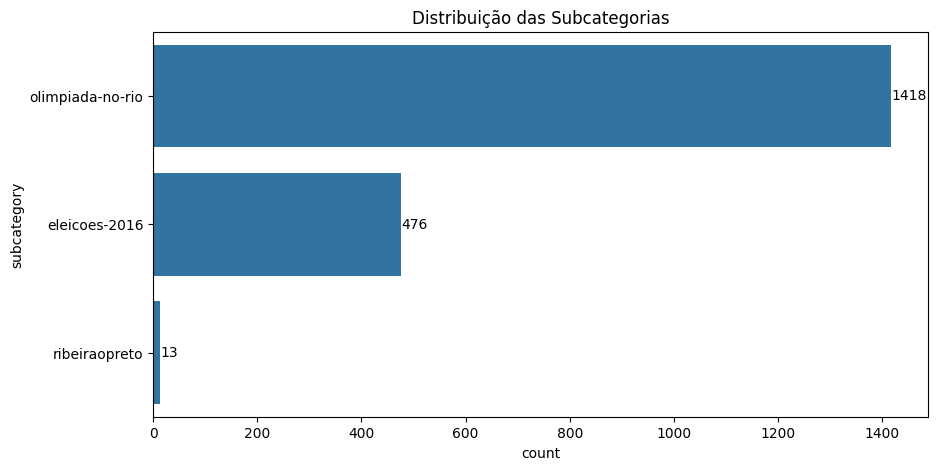

In [13]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(y='subcategory', data=df)
plt.title('Distribuição das Subcategorias')

# valores no final das barras
for p in ax.patches:
    width = p.get_width()  # valor da largura da barra
    plt.text(width + 0.3,  # Posição x da anotação
             p.get_y() + p.get_height() / 2,  # Posição y da anotação
             int(width),  # Valor a ser anotado
             ha='left', va='center')  # Alinhamento da anotação

plt.show()


### Convertendo a coluna 'date' para datetime

In [14]:
df['date'] = pd.to_datetime(df['date'])

### Contagem de publicações por ano

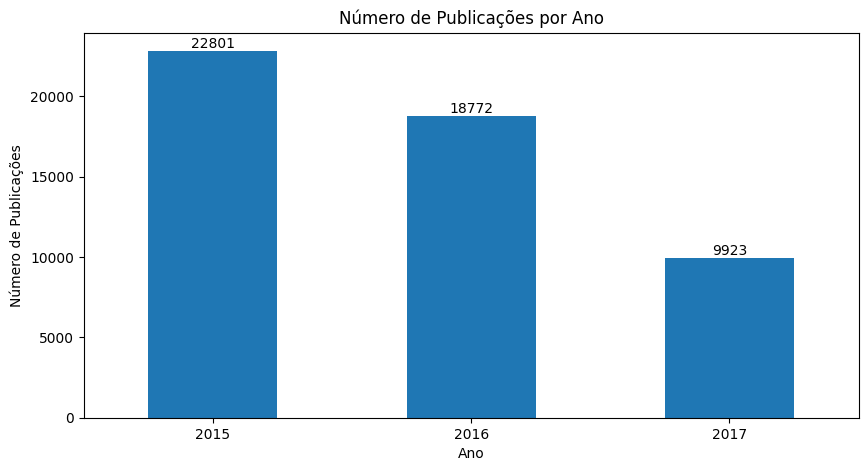

In [15]:
publications_per_year = df['date'].dt.year.value_counts().sort_index()

plt.figure(figsize=(10, 5))
ax = publications_per_year.plot(kind='bar')
plt.title('Número de Publicações por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Publicações')

# Ajustando os rótulos das barras de ano para estarem horizontais
plt.xticks(rotation=0)

# Adicionando os valores em cima das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()


### Contagem de publicações por mês e ano

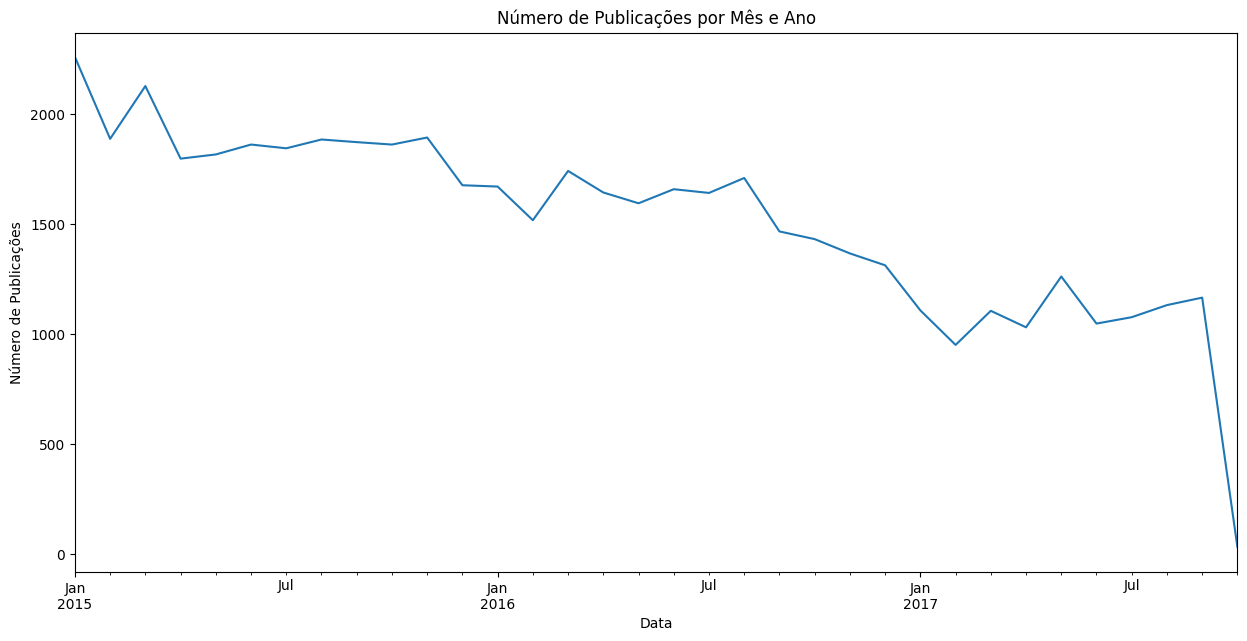

In [16]:
publications_per_month = df.groupby(df['date'].dt.to_period('M')).size()

plt.figure(figsize=(15, 7))
publications_per_month.plot()
plt.title('Número de Publicações por Mês e Ano')
plt.xlabel('Data')
plt.ylabel('Número de Publicações')
plt.show()

### Distribuição do comprimento dos títulos por palavras

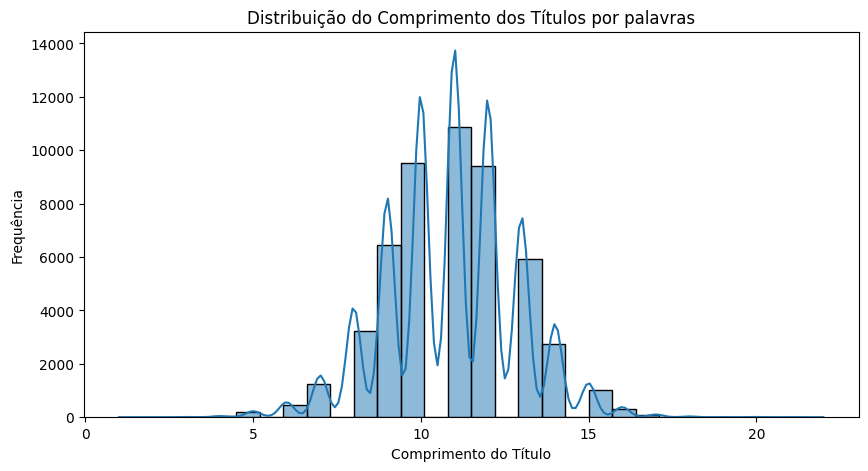

In [17]:
df['title_word_count'] = df['title'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 5))
sns.histplot(df['title_word_count'], bins=30, kde=True)
plt.title('Distribuição do Comprimento dos Títulos por palavras')
plt.xlabel('Comprimento do Título')
plt.ylabel('Frequência')
plt.show()

### Distribuição do comprimento dos textos por palavras

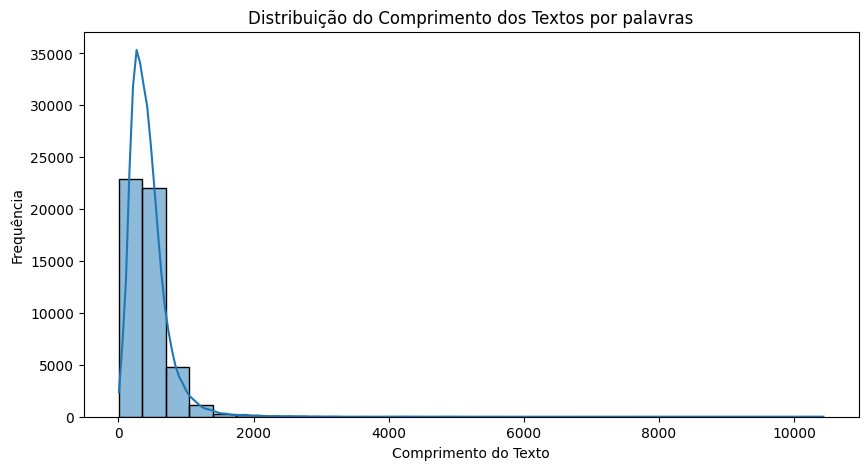

In [18]:
df['text_word_count'] = df['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 5))
sns.histplot(df['text_word_count'], bins=30, kde=True)
plt.title('Distribuição do Comprimento dos Textos por palavras')
plt.xlabel('Comprimento do Texto')
plt.ylabel('Frequência')
plt.show()


### Nuvem de palavras para os títulos

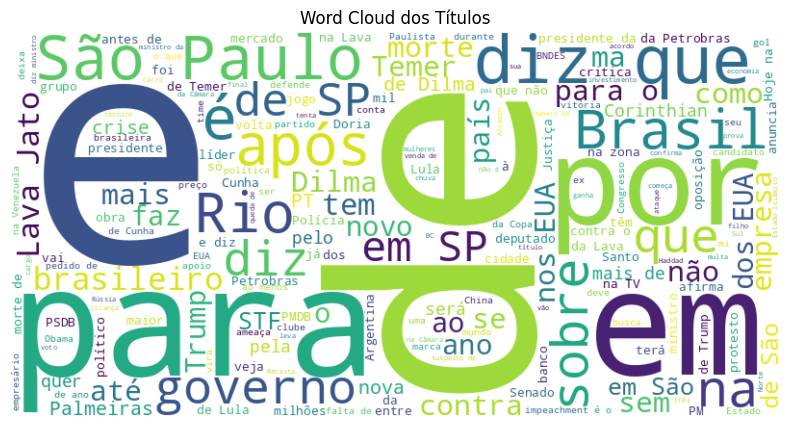

In [19]:
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['title']))
plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.title('Word Cloud dos Títulos')
plt.axis('off')
plt.show()

### Nuvem de palavras para os textos

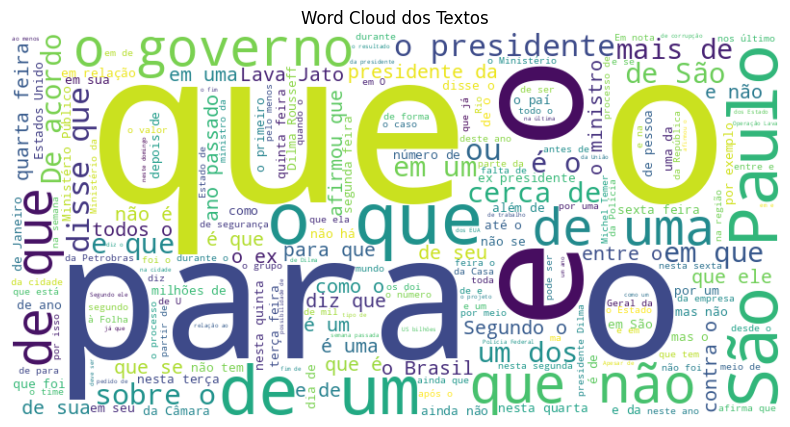

In [20]:
text_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['text']))
plt.figure(figsize=(10, 5))
plt.imshow(text_wordcloud, interpolation='bilinear')
plt.title('Word Cloud dos Textos')
plt.axis('off')
plt.show()

In [21]:
df

,title,text,date,category,subcategory,title_word_count,text_word_count
0,"Haverá pressão por transparência no 'brexit', ...","As negociações do ""brexit"" devem ocorrer a por...",2017-03-31,mundo,NaN,10,197
1,Empresário confirma ter pago propina para obte...,"O empresário Augusto Ribeiro de Mendonça Neto,...",2015-03-02,poder,NaN,10,898
2,Falta de ataques do São Paulo surpreende corin...,Cássio sorriu e pareceu sem jeito com a pergun...,2015-02-19,esporte,NaN,10,261
3,Líderes de comissão do Senado não veem sinais ...,Os líderes dos partidos Republicano e Democrat...,2017-03-16,mundo,NaN,12,398
4,Renan opera contra governo e reforma trabalhis...,Um acordo que contou com a articulação de Rena...,2017-03-05,mercado,NaN,11,559
...,...,...,...,...,...,...,...
51497,"Potencial da saúde ainda é pouco aproveitado, ...",Start-ups da área de saúde nos EUA levantaram ...,2015-07-13,mercado,NaN,9,663
51498,Vítima de racismo nega convite do Chelsea para...,Após ser vítima de atos racistas de torcedores...,2015-02-21,esporte,NaN,11,175
51499,Coreia do Sul promete resgatar balsa um ano ap...,"Um ano após o naufrágio da balsa Sewol, no qua...",2015-04-16,mundo,NaN,10,526
51500,Temer convoca PMDB para evento que debaterá te...,O vice-presidente Michel Temer (PMDB) aparece ...,2015-11-11,poder,NaN,11,280


### Exportando o CSV com os resultados

In [22]:
df.to_csv('../files/result.csv', index=False)